#### Imports


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


### Lectura de dades


In [4]:
import pandas as pd

a2text = pd.read_csv('data/A2-synthetic.txt')

display(a2text)

,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4
...,...,...,...,...,...
355,-0.340733,8.504536,7.903644,-2.032197,6
356,-0.024928,1.551977,6.361992,-0.757714,2
357,-0.668529,-0.607597,0.639295,4.329213,6
358,-0.122711,-5.516957,-2.111173,2.209675,3


### PreProcessament


In [29]:
import pandas as pd

import seaborn as sns

a2real = pd.read_csv('data/A2-real.txt', sep=';')
a2text = pd.read_csv('data/A2-synthetic.txt')

display(a2real)
display(a2text)
# Separate features and labels
# Preparación de datos
X_real = a2real.drop(columns=['Class', 'Location'])
X = a2text.drop(columns=['class'])
y_real = a2real['Class']
y = a2text['class']
z = a2real['Location']

display(y)


,BL,BD,FL,BM,S,Location,Class
0,34.5,18.1,187,2900,1,L2,C1
1,38.8,20.0,190,3950,0,L3,C1
2,45.1,14.5,207,5050,1,L2,C2
3,34.6,21.1,198,4400,0,L1,C1
4,40.6,19.0,199,4000,0,L1,C1
...,...,...,...,...,...,...,...
328,45.0,15.4,220,5050,0,L2,C2
329,43.8,13.9,208,4300,1,L2,C2
330,49.6,16.0,225,5700,0,L2,C2
331,51.5,16.3,230,5500,0,L2,C2


,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4
...,...,...,...,...,...
355,-0.340733,8.504536,7.903644,-2.032197,6
356,-0.024928,1.551977,6.361992,-0.757714,2
357,-0.668529,-0.607597,0.639295,4.329213,6
358,-0.122711,-5.516957,-2.111173,2.209675,3


0      1
1      5
2      2
3      1
4      4
      ..
355    6
356    2
357    6
358    3
359    6
Name: class, Length: 360, dtype: int64

### PCA


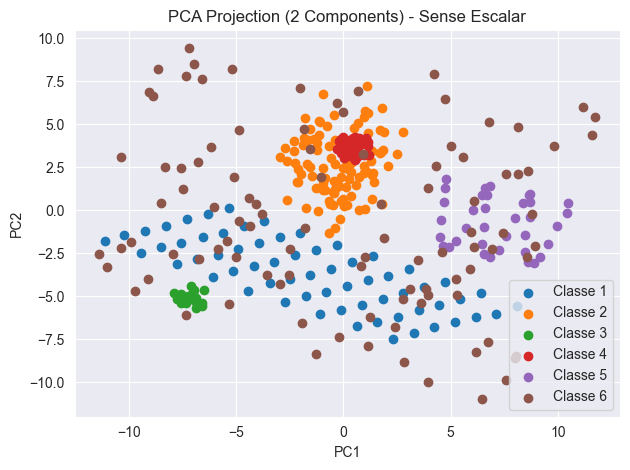

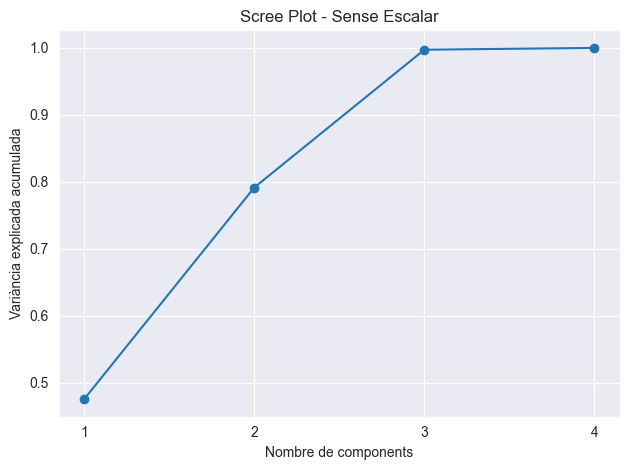

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA amb les dades originals (sense escalar)
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X)

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Classe {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components) - Sense Escalar')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Sense Escalar')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()


#### Comentaris sobre pca

En primer lloc, veiem que la classe 3 i la classe 4 estan molt ben distinguides i concentrades. La classe 2 també està delimitada encara és més llarga i ample aixi com la classe 5. La classe 5 encara que és molt diferent en relació al PCA1, està també delimitada, no obstant la ultima classe(6), sembla ser la classe més heterogenea sense tenir cap zona clara, és molt variant en els dos principals components.

Podem observar que hi ha molta variança entre la classe 3 i la classe 5, i suficient entre la 3 i el conjunt (2 i 4).
Hi ha molta similirat entre la classe 3 i parts de la classe 5 i 6.

El scree plot ens diu que a partir de la tercera dimensió ja trobem una variança entre components de casi 1, mentre que en el primer plot només obtenim 0.8.




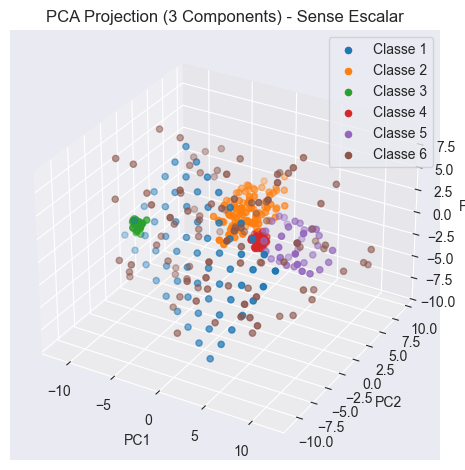

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# PCA amb les dades originals (sense escalar), amb 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

# Projecció en tres dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cls in np.unique(y):
    mask = (y == cls)
    ax.scatter(X_pca3[mask, 0], X_pca3[mask, 1], X_pca3[mask, 2], label=f'Classe {cls}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Projection (3 Components) - Sense Escalar')
plt.legend()
plt.tight_layout()
plt.show()



Per curiositat, hem fet el PCA amb tres components, tot i tenir millor variança és dificil extreure informació rellevant o diferent. Els unics detalls trobats son: La classe 4 sembla ser més diferent que la classe 2 i la classe 6 continua sent bastant heterogenea.

### t-SNE


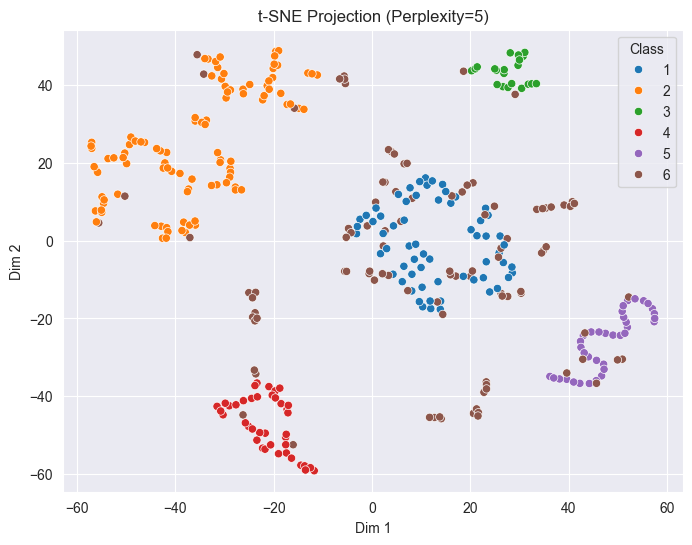

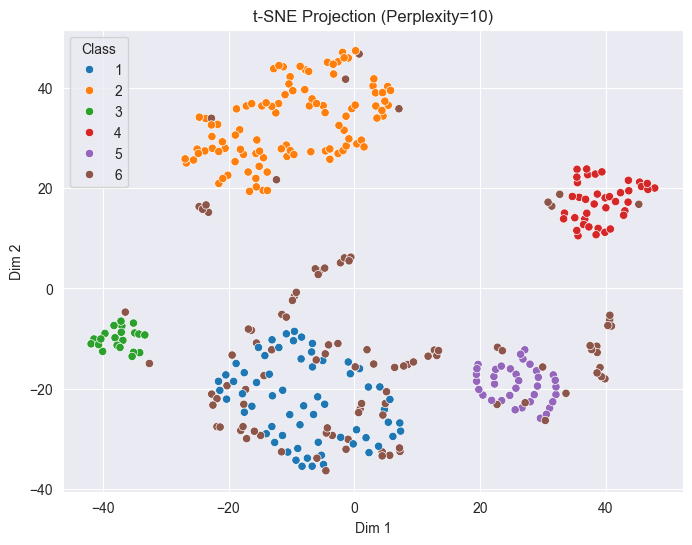

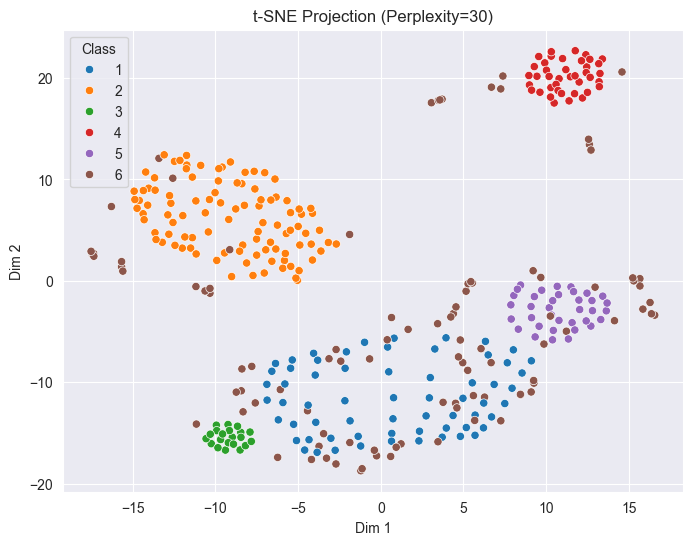

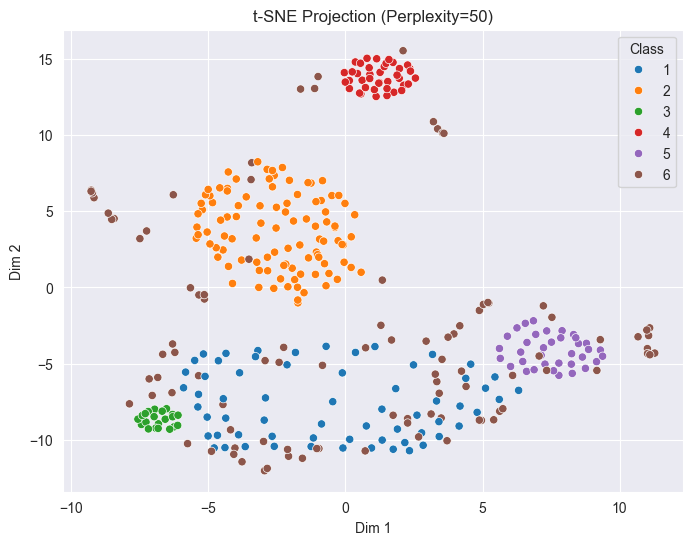

In [12]:
for perplexity in [5, 10, 30, 50 ]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


#### Comentaris sobre t-SNE

A mesura que augmentem la perplexity, els punts de la mateixa classe s'atreuen més tot i que els punts de diferents classes continuen igual de separats(logaristicament). Pel parametre perplexity, trobo que la millor reprentació, la més clara és amb perplexity = 10. És veu clarament els 5 diferents clusters i després la última classe repartida entre la classe 1 i 5. Amb t-SNE s'observa millor que la classe 6, conté en la seva gran majoria registres de la classe 5.


### k-means Clustering

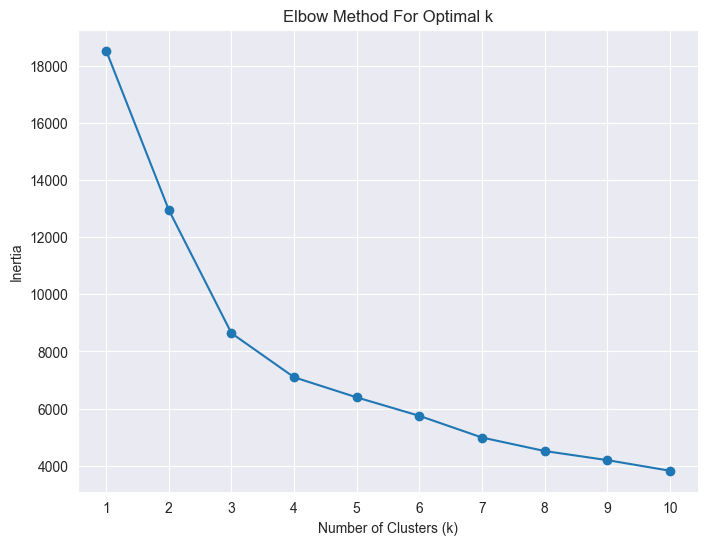

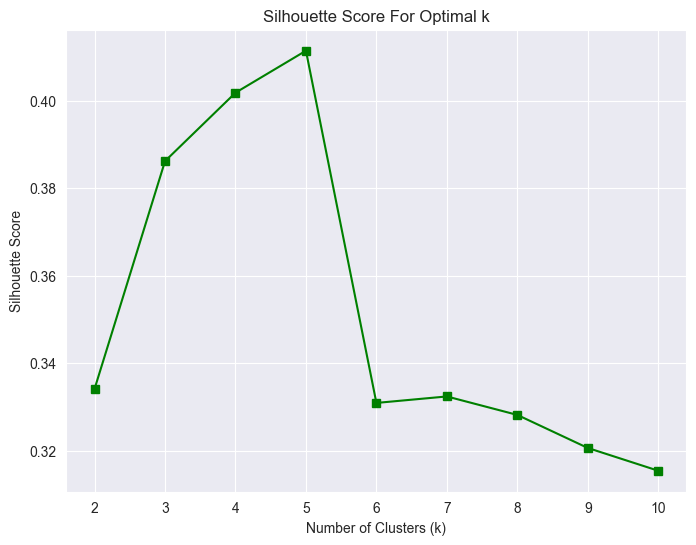

Best k based on Silhouette Score: 5


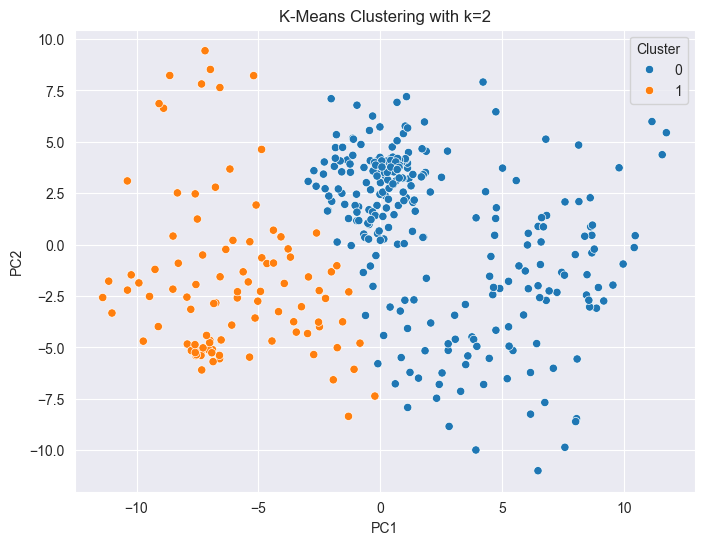

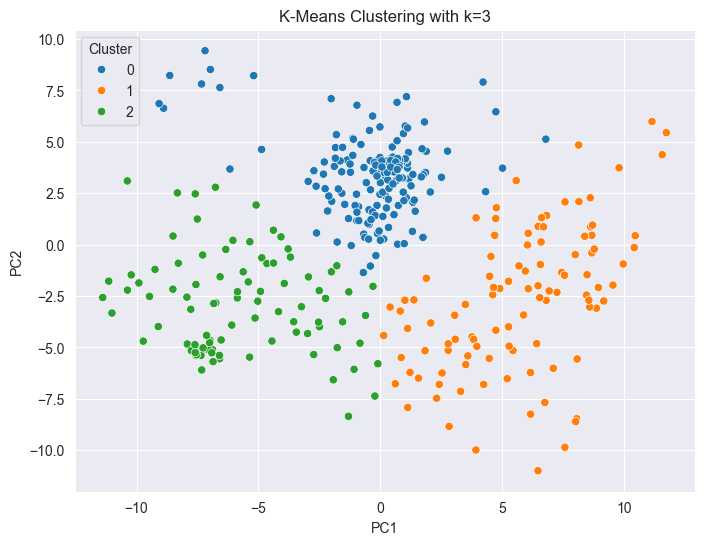

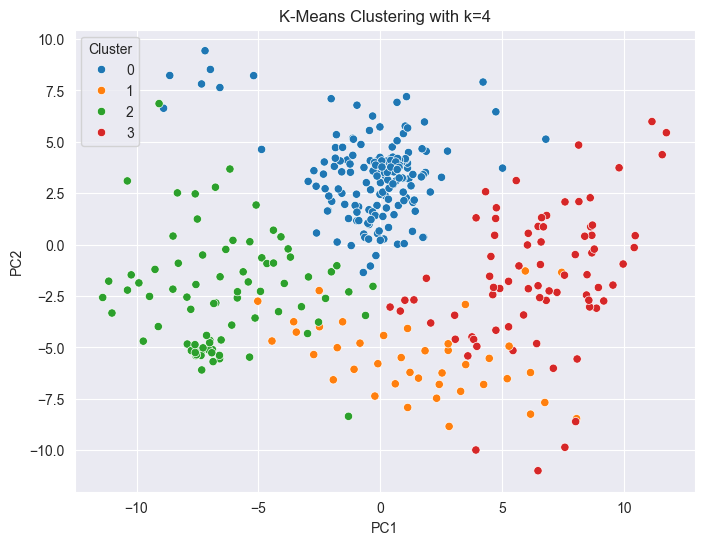

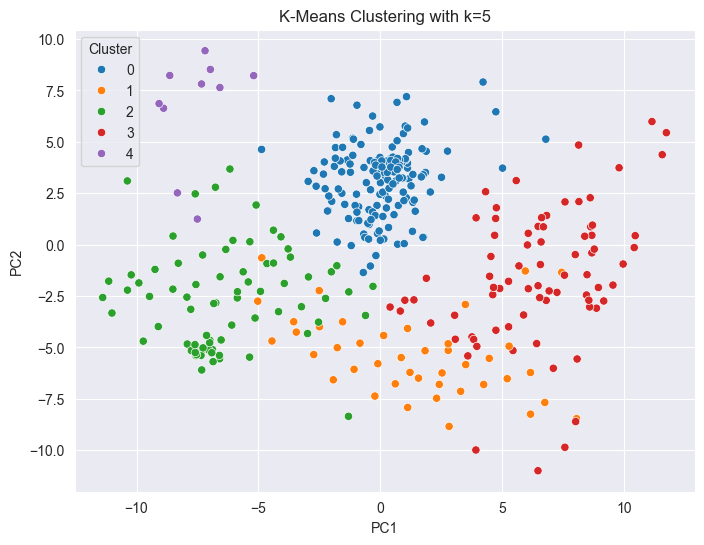

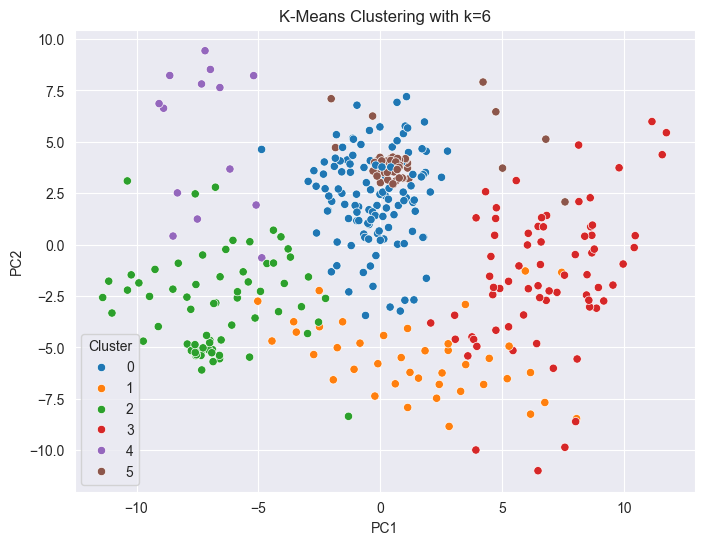

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming X, X_pca, and y are already defined
K = len(np.unique(y))

# Step 1: Elbow and Silhouette Scores
inertias = []
silhouette_scores = []

k_values = range(1, K + 5)  # Start from k=1 for Elbow method

# Elbow method (inertia)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Silhouette scores (start from k=2)
silhouette_k_values = range(2, K + 5)
for k in silhouette_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(silhouette_k_values, silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.xticks(silhouette_k_values)
plt.show()

# Best silhouette score
best_k = silhouette_k_values[np.argmax(silhouette_scores)]
print(f'Best k based on Silhouette Score: {best_k}')

# Step 2: Clustering and ARI analysis
for k in range(2, K + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


### Comentaris sobre k-means

S'ha utlitzat 3 mesures per trobar quina és la millor k, el "punt de colze", la silueta i la representació grafica.

El elbow plot ens indica que la millor k és el 3, ja que és on trobem el elbow point. La representació grafica sembla indicarnos que la millor segmentació és també a k = 3. D'altra banda, al realitzar la silueta, trobem que la millor puntuació la trobem al k = 5, aquesta mesura pot ser recolzada visualment amb la representació gràfica.

Considerant les altres mesures anteriors com el PCA i el t-SNE, ens decantariem per k = 5,  ja que concorda completament amb les conclusions anteriors. Tot i això, tenir només 3 clusters també sembla una bona idea.


# DADES REALS

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
a2real = pd.read_csv('data/A2-real.txt', sep=';')

display(a2real)

# Preparación de datos
X_real = a2real.drop(columns=['Class', 'Location'])
y_real = a2real['Class']
z = a2real['Location']

scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

,BL,BD,FL,BM,S,Location,Class
0,34.5,18.1,187,2900,1,L2,C1
1,38.8,20.0,190,3950,0,L3,C1
2,45.1,14.5,207,5050,1,L2,C2
3,34.6,21.1,198,4400,0,L1,C1
4,40.6,19.0,199,4000,0,L1,C1
...,...,...,...,...,...,...,...
328,45.0,15.4,220,5050,0,L2,C2
329,43.8,13.9,208,4300,1,L2,C2
330,49.6,16.0,225,5700,0,L2,C2
331,51.5,16.3,230,5500,0,L2,C2


### PCA


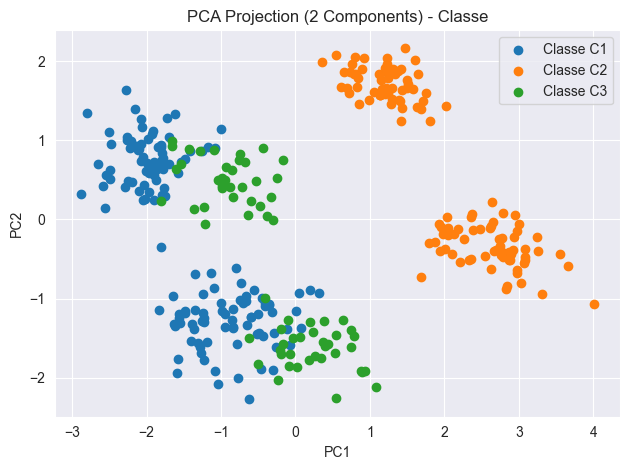

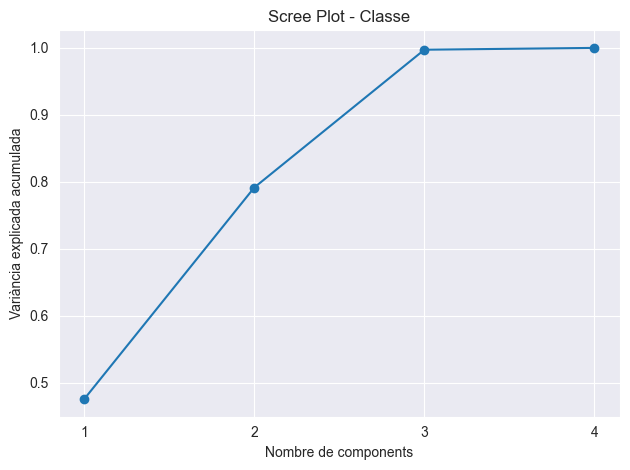

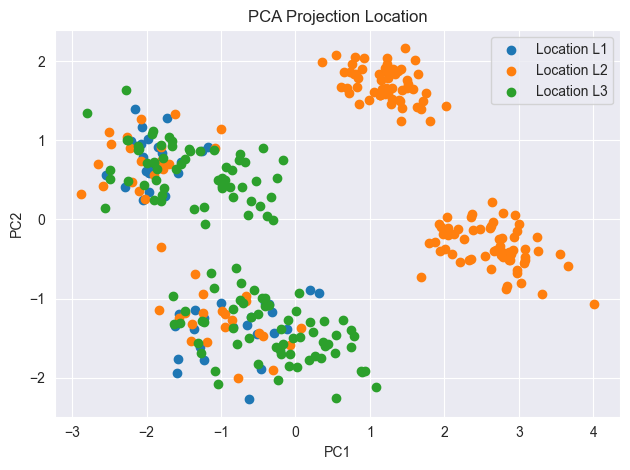

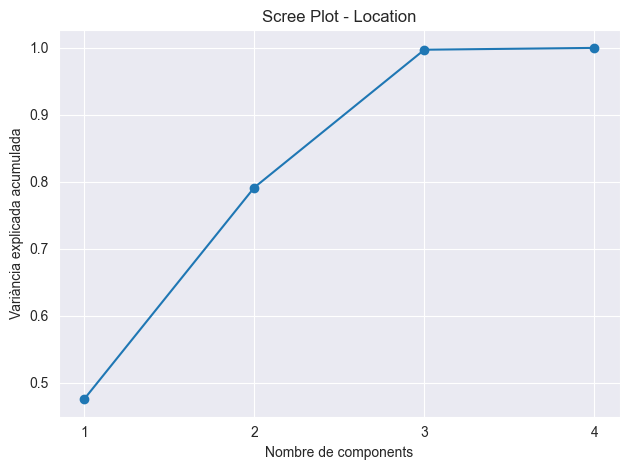

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA amb les dades originals (sense escalar)
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_real)

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(y_real):
    mask = (y_real == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Classe {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components) - Classe')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Classe')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(z):
    mask = (z == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Location {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Location')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Location')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()


### Conclusions sobre dades reals

Veiem que 3 components son suficients per obtenir la gran part de la informació. En la classe és veu les tres classes bé repartides i segmentades, per localització no tant, sembla ser que hi ha una barreja entre la localització L1 i L3. El scree plot ens dius que ens faltaria al menys una dimensió més per poder destingir correctament Location.


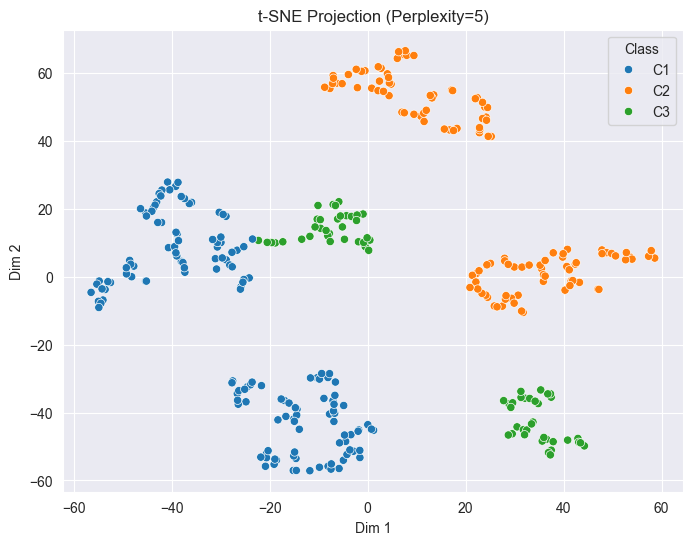

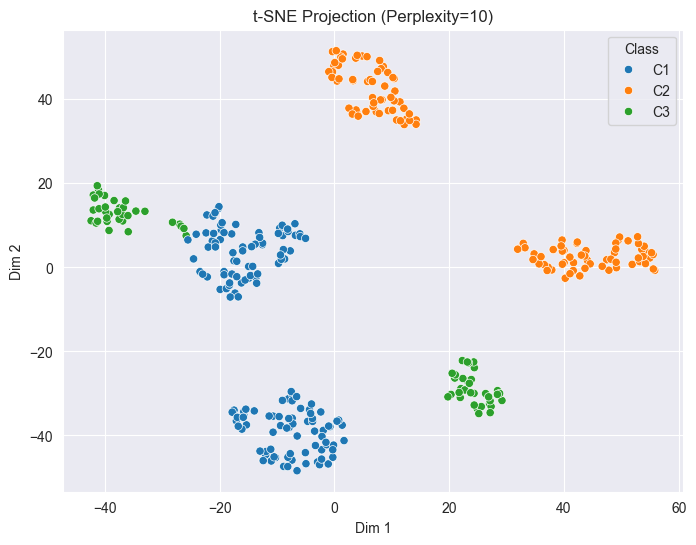

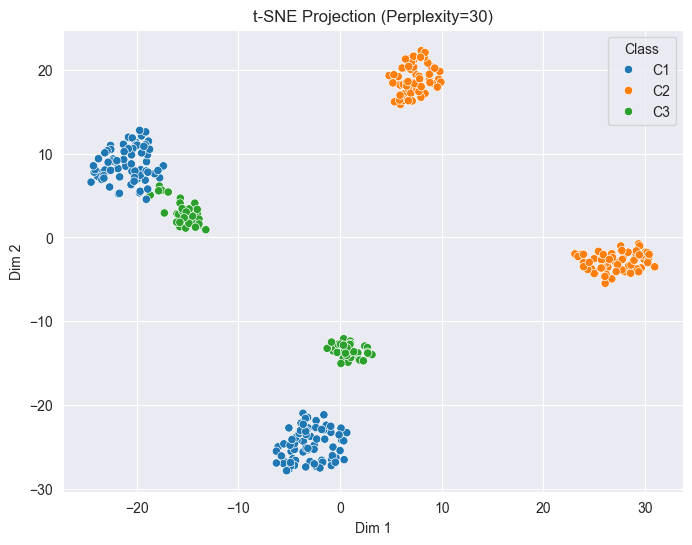

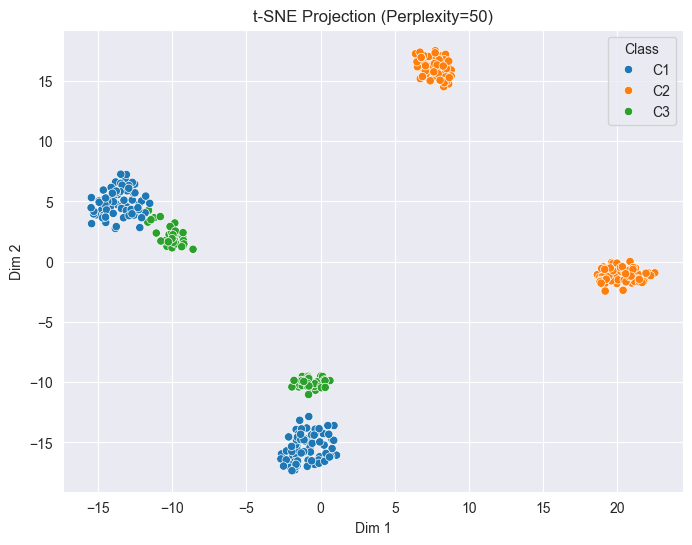

In [37]:
for perplexity in [5, 10, 30, 50 ]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne_real = tsne.fit_transform(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne_real[:, 0], y=X_tsne_real[:, 1], hue=y_real, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


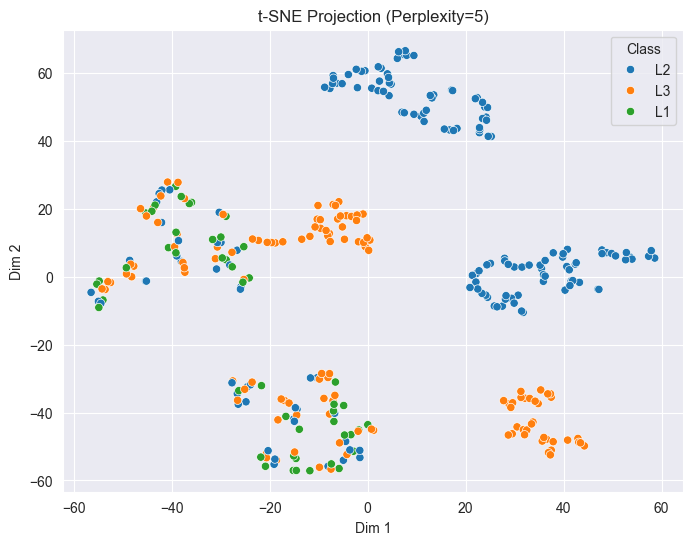

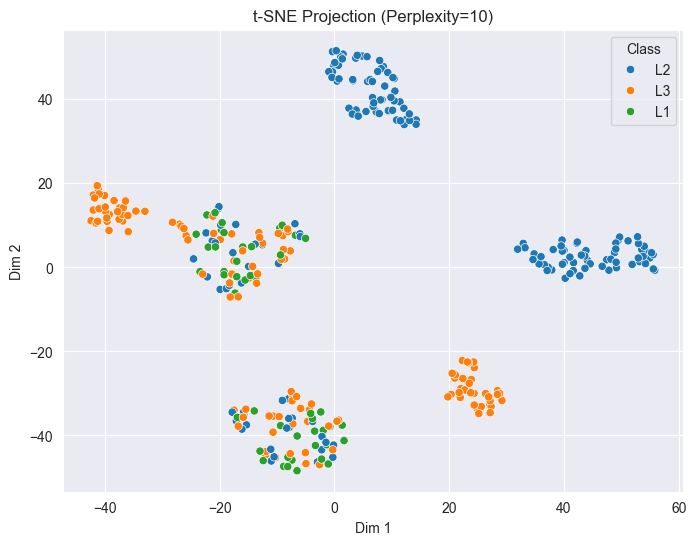

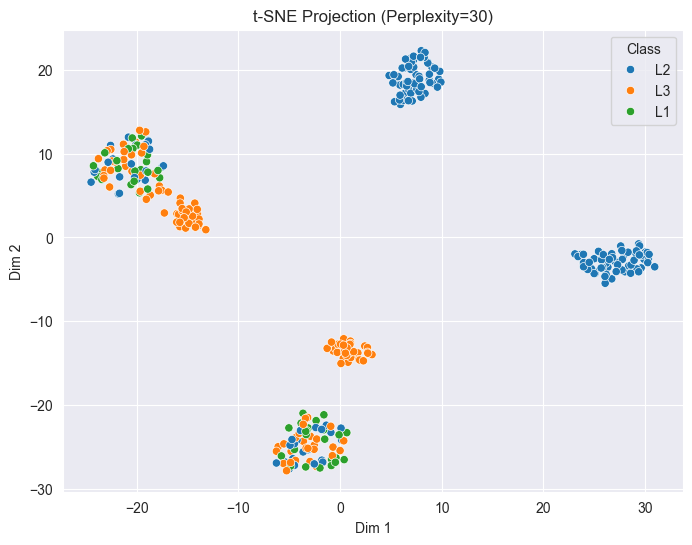

In [39]:
for perplexity in [5, 10, 30]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne_real = tsne.fit_transform(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne_real[:, 0], y=X_tsne_real[:, 1], hue=z, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


### Comentari sobre T-SNE

A mesura que augmentem la perplexitat només es segmenta la classe C2, les altres dues tendeixen a segmentarse en dos, sembla que hi ha dos subgrups dins de la classe C1 i C3(un cop escalades les dades). En el cas de la localització ens falta variança, no som capaços de trobar la classe L1 segmentada ja que comparteix espai amb les altres dues.

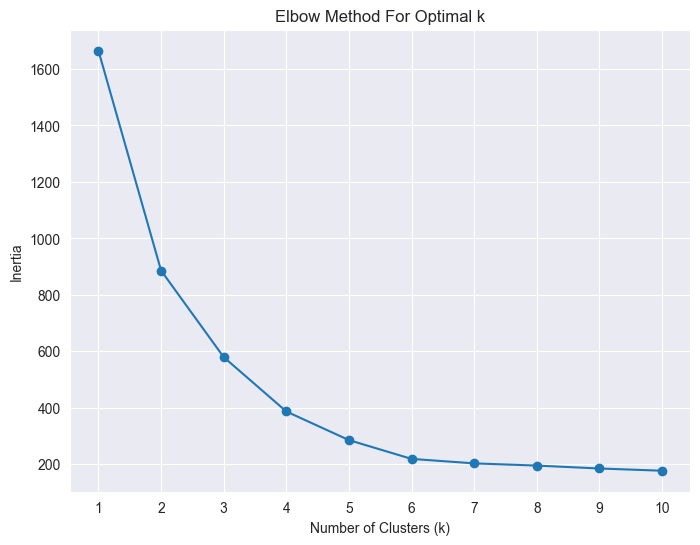

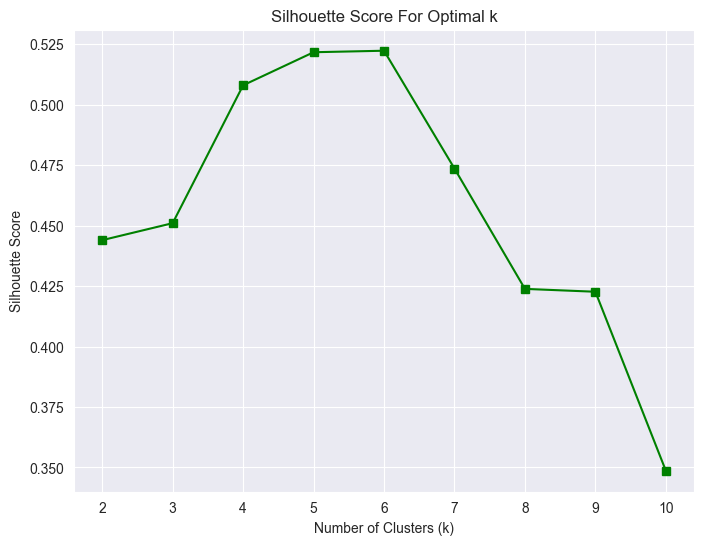

Best k based on Silhouette Score: 6


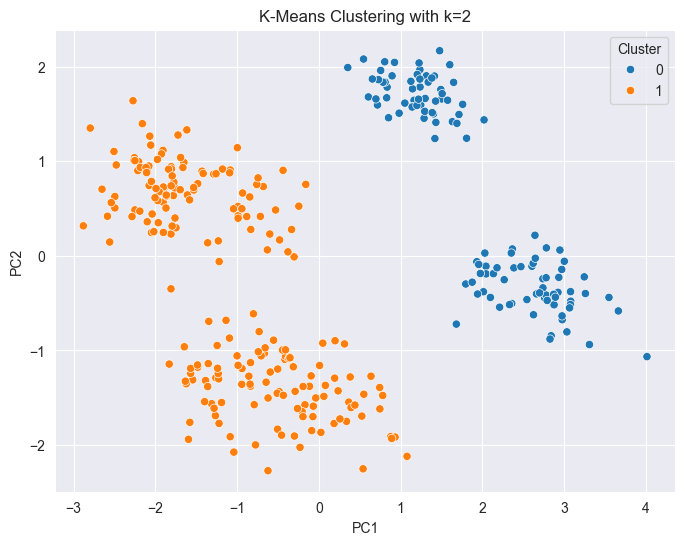

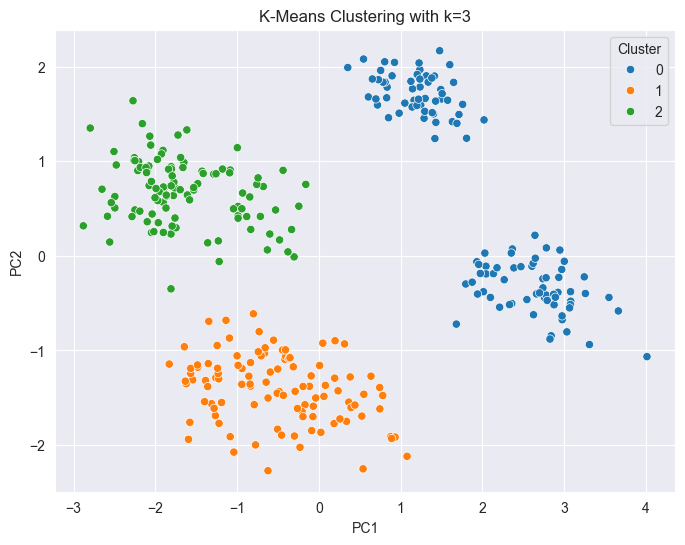

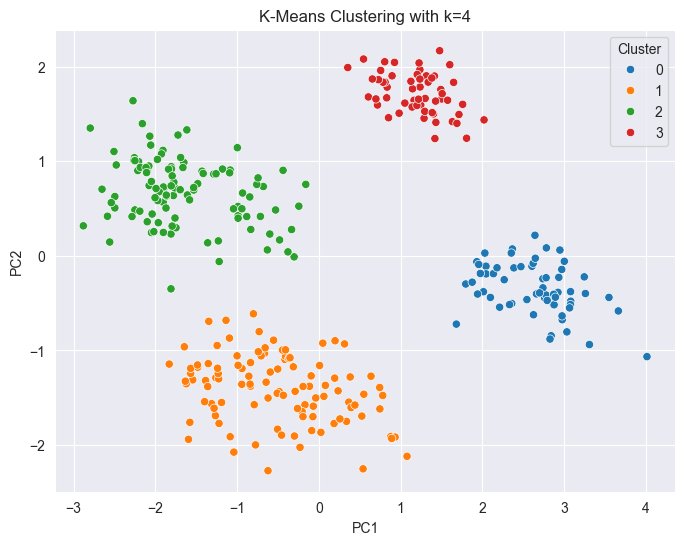

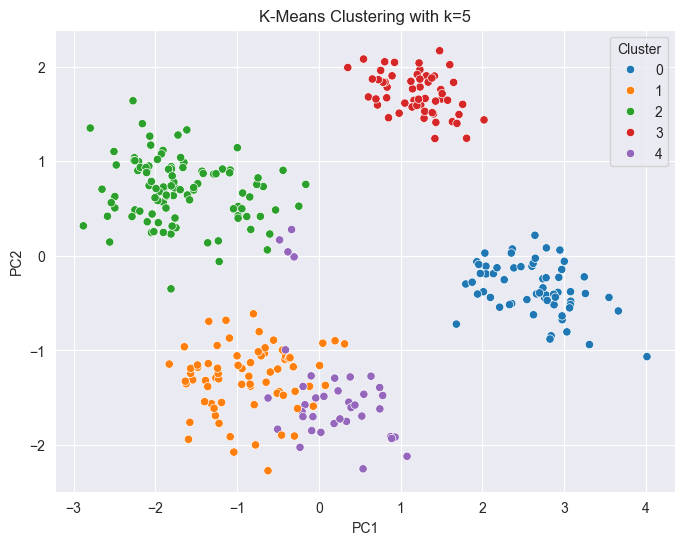

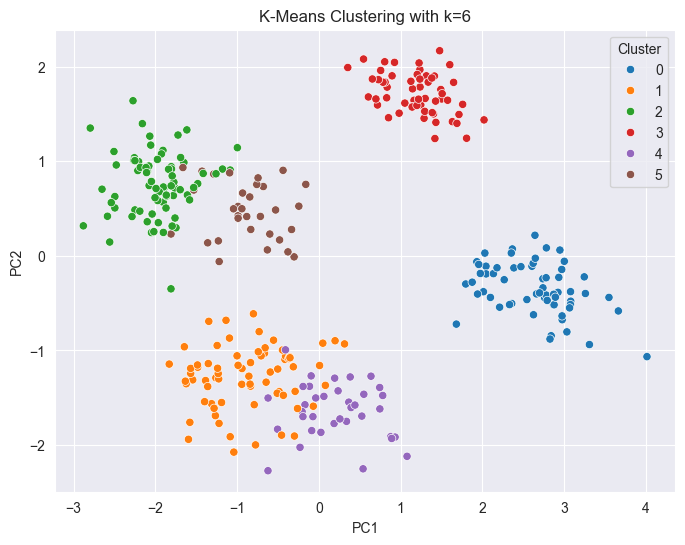

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming X, X_pca, and y are already defined
K = len(np.unique(y))

# Step 1: Elbow and Silhouette Scores
inertias = []
silhouette_scores = []

k_values = range(1, K + 5)  # Start from k=1 for Elbow method

# Elbow method (inertia)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_real)
    inertias.append(kmeans.inertia_)

# Silhouette scores (start from k=2)
silhouette_k_values = range(2, K + 5)
for k in silhouette_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_real)
    score = silhouette_score(X_real, cluster_labels)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(silhouette_k_values, silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.xticks(silhouette_k_values)
plt.show()

# Best silhouette score
best_k = silhouette_k_values[np.argmax(silhouette_scores)]
print(f'Best k based on Silhouette Score: {best_k}')

# Step 2: Clustering and ARI analysis
for k in range(2, K + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


### Comentari sobre K-means

Veiem que cada metode ens dona diferents mesures, el elbow point no és evident encara que podem apreciar que podria estar al 5. El metode de la silueta en canvi ens dona molt bona puntuació en el 5 pero sobretot amb k = 6.
 Despres d'aquestes dades, tot sembla que la representació gràfica es veuria bé segmentada amb k = 5 o k= 6, i encara que amb k=6 trobem una bona segmentació, la segmentació més clara la trobem a k=4, tot i que, els clusters són més dispersos. Observant els resultats anterior en altres mesures, sembla ser que el millor valor és k=6.